# Futebol Feminino

## import

In [1]:
import pandas as pd
import numpy as np

In [2]:
# se o Pandas apresentar erro, ler a mensagem.
# no meu caso apresentou erro por falta da biblioteca openpyxl
# instalei com o comando abaixo:
#
# !pip install openpyxl

## dados

In [3]:
dados = pd.read_excel("copa_feminina.xlsx")
dados.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2
0,1991,China,Noruega,4.0,0.0,Grupo A,NaN,NaN
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,NaN,NaN
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,NaN,NaN
3,1991,China,Dinamarca,2.0,2.0,Grupo A,NaN,NaN
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,NaN,NaN


## Tratamento dos dados

### tratar os nulos

In [4]:
# preencher os nulos com zero
df = dados.fillna(0)
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0


### Total de gols

In [5]:
df['Total_Gols_Marcados_Selecao1'] = df['Gols Seleção 1']+df['Pênaltis Seleção 1']
df['Total_Gols_Marcados_Selecao2'] = df['Gols Seleção 2']+df['Pênaltis Seleção 2']
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0


### Saldo de gols

In [6]:
df['Saldo'] = df['Total_Gols_Marcados_Selecao1']-df['Total_Gols_Marcados_Selecao2']
df.head()

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,3.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,0.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,3.0


### Seleção 1 ganhou?

In [7]:
resultados = list()
for saldo in df[['Saldo']].values:
    if saldo > 0:
        resultados.append(1)
#    elif saldo < 0:
#        resultados.append(-1)
    else:
        resultados.append(0)
df['selecao_1_ganhou'] = resultados

df.head(10)

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,Saldo,selecao_1_ganhou
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,3.0,1
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,4.0,1
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,0.0,0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,3.0,1
5,1991,Noruega,Dinamarca,2.0,1.0,Grupo A,0.0,0.0,2.0,1.0,1.0,1
6,1991,Japão,Brasil,0.0,1.0,Grupo B,0.0,0.0,0.0,1.0,-1.0,0
7,1991,Suécia,Estados Unidos,2.0,5.0,Grupo B,0.0,0.0,2.0,5.0,-3.0,0
8,1991,Japão,Suécia,0.0,8.0,Grupo B,0.0,0.0,0.0,8.0,-8.0,0
9,1991,Brasil,Estados Unidos,0.0,5.0,Grupo B,0.0,0.0,0.0,5.0,-5.0,0


### Status das Seleções em cada Edição

#### Seleção 1

In [8]:
df_status_sel1 = df.groupby(["Seleção 1", "ANO"]).agg({"Seleção 1": "size",
                                                       "Total_Gols_Marcados_Selecao1": "sum",
                                                       "Total_Gols_Marcados_Selecao2": "sum",
                                                       "Saldo": "sum"})
df_status_sel1.columns = ['n_games', 'gols_feitos', 'gols_sofridos', 'saldo']
df_status_sel1.index = df_status_sel1.index.rename(['SELECAO', 'ANO'])
df_status_sel1

n_games  gols_feitos  gols_sofridos  saldo
SELECAO       ANO                                             
Alemanha      1991        3          6.0            9.0   -3.0
              1995        4          5.0            2.0    3.0
              1999        3         10.0            4.0    6.0
              2003        4         16.0            3.0   13.0
              2007        5         21.0            0.0   21.0
...                     ...          ...            ...    ...
Taipé Chinês  1991        3          2.0            8.0   -6.0
Vietnã        2023        1          0.0            0.0    0.0
Zâmbia        2023        1          0.0            5.0   -5.0
África do Sul 2019        2          0.0            5.0   -5.0
              2023        1          0.0            0.0    0.0

[156 rows x 4 columns]

#### Seleção 2

In [9]:
df_status_sel2 = df.groupby(["Seleção 2", "ANO"]).agg({"Seleção 2": "size",
                                                       "Total_Gols_Marcados_Selecao2": "sum",
                                                       "Total_Gols_Marcados_Selecao1": "sum",
                                                       "Saldo": "sum"})
df_status_sel2.columns = ['n_games', 'gols_feitos', 'gols_sofridos', 'saldo']
df_status_sel2['saldo'] = df_status_sel2['saldo'] * -1 
df_status_sel2.index = df_status_sel2.index.rename(['SELECAO', 'ANO'])
df_status_sel2

n_games  gols_feitos  gols_sofridos  saldo
SELECAO       ANO                                             
Alemanha      1991        3          7.0            1.0    6.0
              1995        2          8.0            4.0    4.0
              1999        1          2.0            3.0   -1.0
              2003        2          9.0            1.0    8.0
              2007        1          0.0            0.0   -0.0
...                     ...          ...            ...    ...
Taipé Chinês  1991        1          0.0            7.0   -7.0
Vietnã        2023        2          0.0            5.0   -5.0
Zâmbia        2023        2          0.0            5.0   -5.0
África do Sul 2019        1          1.0            3.0   -2.0
              2023        2          3.0            4.0   -1.0

[163 rows x 4 columns]

### df_status | Status das Seleções

In [10]:
df_status = df_status_sel1.add(df_status_sel2, fill_value=0).reset_index()
df_status.sort_values("ANO", inplace=True)
df_status

,SELECAO,ANO,n_games,gols_feitos,gols_sofridos,saldo
0,Alemanha,1991,6.0,13.0,10.0,3.0
100,Itália,1991,4.0,8.0,5.0,3.0
21,Brasil,1991,3.0,1.0,7.0,-6.0
119,Nigéria,1991,3.0,0.0,7.0,-7.0
128,Noruega,1991,6.0,14.0,10.0,4.0
...,...,...,...,...,...,...
136,Noruega,2023,3.0,0.0,1.0,-1.0
67,Dinamarca,2023,3.0,1.0,1.0,0.0
142,Nova Zelândia,2023,3.0,1.0,1.0,0.0
82,Filipinas,2023,3.0,1.0,2.0,-1.0


In [11]:
df_status[df_status["SELECAO"]=="Brasil"]

,SELECAO,ANO,n_games,gols_feitos,gols_sofridos,saldo
21,Brasil,1991,3.0,1.0,7.0,-6.0
22,Brasil,1995,3.0,3.0,9.0,-6.0
23,Brasil,1999,6.0,21.0,13.0,8.0
24,Brasil,2003,4.0,9.0,4.0,5.0
25,Brasil,2007,6.0,17.0,4.0,13.0
26,Brasil,2011,4.0,12.0,7.0,5.0
27,Brasil,2015,4.0,4.0,1.0,3.0
28,Brasil,2019,4.0,7.0,5.0,2.0
29,Brasil,2023,3.0,4.0,0.0,4.0


### Status acumulado ao longo dos anos

In [12]:
# aqui eu removo o campo ano, para nao ser feito a soma dos anos, o que não faz sentido!
df_status_acumulado = df_status[['SELECAO','n_games','gols_feitos','gols_sofridos','saldo']].\
    groupby("SELECAO").cumsum()

df_status_acumulado['SELECAO'] = df_status['SELECAO']

df_status_acumulado['ANO'] = df_status['ANO']

df_status_acumulado.sort_values("ANO", inplace=True)

df_status_acumulado

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
0,6.0,13.0,10.0,3.0,Alemanha,1991
163,4.0,2.0,15.0,-13.0,Taipé Chinês,1991
63,4.0,7.0,6.0,1.0,Dinamarca,1991
150,6.0,18.0,9.0,9.0,Suécia,1991
41,4.0,10.0,4.0,6.0,China,1991
...,...,...,...,...,...,...
61,6.0,3.0,9.0,-6.0,Costa Rica,2023
48,36.0,62.0,41.0,21.0,China,2023
82,3.0,1.0,2.0,-1.0,Filipinas,2023
99,3.0,1.0,3.0,-2.0,Irlanda,2023


#### Verificando o status da Alemanha

In [13]:
df_status_acumulado[df_status_acumulado['SELECAO'] =='Alemanha']

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
0,6.0,13.0,10.0,3.0,Alemanha,1991
1,12.0,26.0,16.0,10.0,Alemanha,1995
2,16.0,38.0,23.0,15.0,Alemanha,1999
3,22.0,63.0,27.0,36.0,Alemanha,2003
4,28.0,84.0,27.0,57.0,Alemanha,2007
5,32.0,91.0,31.0,60.0,Alemanha,2011
6,39.0,116.0,41.0,75.0,Alemanha,2015
7,44.0,126.0,43.0,83.0,Alemanha,2019
8,47.0,132.0,43.0,89.0,Alemanha,2023


#### Verificando o status do Brasil

In [14]:
df_status_acumulado[df_status_acumulado['SELECAO'] =='Brasil']

,n_games,gols_feitos,gols_sofridos,saldo,SELECAO,ANO
21,3.0,1.0,7.0,-6.0,Brasil,1991
22,6.0,4.0,16.0,-12.0,Brasil,1995
23,12.0,25.0,29.0,-4.0,Brasil,1999
24,16.0,34.0,33.0,1.0,Brasil,2003
25,22.0,51.0,37.0,14.0,Brasil,2007
26,26.0,63.0,44.0,19.0,Brasil,2011
27,30.0,67.0,45.0,22.0,Brasil,2015
28,34.0,74.0,50.0,24.0,Brasil,2019
29,37.0,78.0,50.0,28.0,Brasil,2023


## Machine Learning

### Função Gera_DF

In [15]:
# Função que vai gerar um DataFrame com o tabelão que tenha os resultados dos jogos até o ano analisado
# + status dos times até o ano analisado
def fn_gera_df(df, df_status_acumulado_, df_status_):
    df_ = pd.merge_asof(df, df_status_acumulado_, left_by=['Seleção 1'], right_by=['SELECAO'], on=['ANO'])
    df_ = pd.merge_asof(df_, df_status_acumulado_, left_by=['Seleção 2'], right_by=['SELECAO'], on=['ANO'], suffixes=['_SEL1', '_SEL2'])
    df_ = pd.merge_asof(df_, df_status_, left_by=['Seleção 1'], right_by=['SELECAO'], on=['ANO'])
    df_ = pd.merge_asof(df_, df_status_, left_by=['Seleção 2'], right_by=['SELECAO'], on=['ANO'], suffixes=['_status1', '_status2'])
    df_ = df_.loc[:,~df_.columns.duplicated()].copy()
    return df_

In [16]:
# pd.set_option('display.max_columns', None)
# df_[df_['Seleção 1'] == "Alemanha"].head()

### lista das datas

In [17]:
dados['ANO'].unique().tolist()

[1991, 1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]

In [18]:
dados['ANO'].unique().tolist()[1:]

[1995, 1999, 2003, 2007, 2011, 2015, 2019, 2023]

In [19]:
dados['ANO'].unique().tolist()[1:-1]

[1995, 1999, 2003, 2007, 2011, 2015, 2019]

### primeiro modelo | Regressão Logística

In [20]:
# import do modelo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler #StandardScaler, 
from sklearn.metrics import log_loss, roc_auc_score, classification_report, f1_score, accuracy_score

In [21]:
edicao = 1995

In [22]:
df_estudo = df[df['ANO'] <= edicao].copy()
df_estudo = fn_gera_df(df_estudo, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

scaler = MinMaxScaler().fit(df_estudo[features])
df_estudo_scale = scaler.transform(df_estudo[features])

In [23]:
print ('Features: ',df_estudo_scale.shape)
print (df_estudo_scale)

Features:  (52, 16)
[[0.11111111 0.23809524 0.         0.45833333 0.33333333 0.33333333
  0.3125     0.42857143 0.33333333 0.37037037 0.21428571 0.54285714
  1.         0.51851852 0.64285714 0.48571429]
 [0.11111111 0.16666667 0.11764706 0.35416667 0.         0.02380952
  0.375      0.14285714 0.33333333 0.25925926 0.35714286 0.4
  0.         0.03703704 0.71428571 0.08571429]
 [0.33333333 0.33333333 0.35294118 0.41666667 0.         0.02380952
  0.375      0.14285714 1.         0.51851852 0.64285714 0.48571429
  0.         0.03703704 0.71428571 0.08571429]
 [0.11111111 0.23809524 0.         0.45833333 0.11111111 0.16666667
  0.0625     0.36734694 0.33333333 0.37037037 0.21428571 0.54285714
  0.33333333 0.25925926 0.35714286 0.4       ]
 [0.11111111 0.23809524 0.         0.45833333 0.         0.02380952
  0.375      0.14285714 0.33333333 0.37037037 0.21428571 0.54285714
  0.         0.03703704 0.71428571 0.08571429]
 [0.33333333 0.33333333 0.35294118 0.41666667 0.11111111 0.16666667
  0.

In [24]:
df_estudo

,ANO,Seleção 1,Seleção 2,Gols Seleção 1,Gols Seleção 2,Fase,Pênaltis Seleção 1,Pênaltis Seleção 2,Total_Gols_Marcados_Selecao1,Total_Gols_Marcados_Selecao2,...,SELECAO_status1,n_games_status1,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2
0,1991,China,Noruega,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,...,China,4.0,10.0,4.0,6.0,Noruega,6.0,14.0,10.0,4.0
1,1991,Dinamarca,Nova Zelândia,3.0,0.0,Grupo A,0.0,0.0,3.0,0.0,...,Dinamarca,4.0,7.0,6.0,1.0,Nova Zelândia,3.0,1.0,11.0,-10.0
2,1991,Noruega,Nova Zelândia,4.0,0.0,Grupo A,0.0,0.0,4.0,0.0,...,Noruega,6.0,14.0,10.0,4.0,Nova Zelândia,3.0,1.0,11.0,-10.0
3,1991,China,Dinamarca,2.0,2.0,Grupo A,0.0,0.0,2.0,2.0,...,China,4.0,10.0,4.0,6.0,Dinamarca,4.0,7.0,6.0,1.0
4,1991,China,Nova Zelândia,4.0,1.0,Grupo A,0.0,0.0,4.0,1.0,...,China,4.0,10.0,4.0,6.0,Nova Zelândia,3.0,1.0,11.0,-10.0
5,1991,Noruega,Dinamarca,2.0,1.0,Grupo A,0.0,0.0,2.0,1.0,...,Noruega,6.0,14.0,10.0,4.0,Dinamarca,4.0,7.0,6.0,1.0
6,1991,Japão,Brasil,0.0,1.0,Grupo B,0.0,0.0,0.0,1.0,...,Japão,3.0,0.0,12.0,-12.0,Brasil,3.0,1.0,7.0,-6.0
7,1991,Suécia,Estados Unidos,2.0,5.0,Grupo B,0.0,0.0,2.0,5.0,...,Suécia,6.0,18.0,9.0,9.0,Estados Unidos,6.0,27.0,5.0,22.0
8,1991,Japão,Suécia,0.0,8.0,Grupo B,0.0,0.0,0.0,8.0,...,Japão,3.0,0.0,12.0,-12.0,Suécia,6.0,18.0,9.0,9.0
9,1991,Brasil,Estados Unidos,0.0,5.0,Grupo B,0.0,0.0,0.0,5.0,...,Brasil,3.0,1.0,7.0,-6.0,Estados Unidos,6.0,27.0,5.0,22.0


In [25]:
#selecionando as colunas que vamos usar
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

In [26]:
Xtr = df_estudo_scale[:26]
Xval = df_estudo_scale[26:]
ytr = df_estudo['selecao_1_ganhou'][:26]
yval = df_estudo['selecao_1_ganhou'][26:]

In [27]:
mdl = LogisticRegression()
mdl.fit(Xtr, ytr)

LogisticRegression()

In [28]:
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

In [29]:
log_loss(yval, p)

0.4062228610323662

In [30]:
#acuracia = roc_auc_score(yval,p,multi_class='ovr')
acuracia = accuracy_score(yval, p_)
print("Ano: {} | LL: {} | AUC: {}".format(edicao, log_loss(yval, p), acuracia))

Ano: 1995 | LL: 0.4062228610323662 | AUC: 0.8076923076923077


In [31]:
print(classification_report(yval, p_))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.82      0.88      0.85        16

    accuracy                           0.81        26
   macro avg       0.80      0.79      0.79        26
weighted avg       0.81      0.81      0.81        26



In [32]:
import seaborn as sns

<AxesSubplot:xlabel='previsao', ylabel='real'>

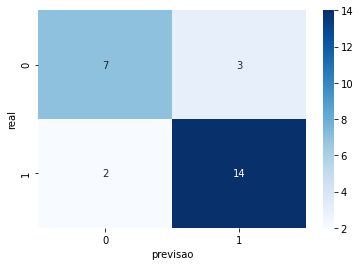

In [33]:
#confusion Matrix

res=yval
pred=p_

cf=pd.DataFrame({'real': res, 'previsao':pred})

cf=pd.DataFrame(cf,columns=['real','previsao' ])

cf_matrix=pd.crosstab(cf['real'], cf['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

#### Fazendo um loop e validando a tabela toda

In [34]:
dados['ANO'].unique().tolist()[1:-1]

[1995, 1999, 2003, 2007, 2011, 2015, 2019]

In [35]:
print(type(df_estudo_scale))

<class 'numpy.ndarray'>


In [36]:
acuracia = list()
anos = dados['ANO'].unique().tolist()[1:-1]

for edicao in anos:
    #normalizando todos os dados
    df_estudo = df[df['ANO'] <= edicao].copy()
    df_estudo = fn_gera_df(df_estudo, df_status_acumulado, df_status)
    features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
                'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
                'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
                'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

    scaler = MinMaxScaler().fit(df_estudo[features])
    df_estudo_scale = scaler.transform(df_estudo[features]) #retorna um numpy
    df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

    #adiciona as colunas
    df_estudo_scale['ANO'] = df['ANO']
    df_estudo_scale['Seleção 1'] = df['Seleção 1']
    df_estudo_scale['Seleção 2'] = df['Seleção 2']
    df_estudo_scale['selecao_1_ganhou'] = df['selecao_1_ganhou']

    dftr = df_estudo_scale[df_estudo_scale['ANO'] < edicao].copy()
    dfval = df_estudo_scale[df_estudo_scale['ANO'] == edicao].copy()
    
    Xtr = dftr[features]
    Xval = dfval[features]
    ytr = dftr['selecao_1_ganhou']
    yval = dfval['selecao_1_ganhou']
    
    mdl = LogisticRegression(max_iter=1000)
    mdl.fit(Xtr, ytr)
    
    p = mdl.predict_proba(Xval)[:,1]
    p_ = mdl.predict(Xval)
    
    acuracia_ = accuracy_score(yval, p_)
    print("Ano: {} | LL: {} | AUC: {}".format(edicao, log_loss(yval, p), acuracia_))
    acuracia.append(acuracia_)
    print()
    print(classification_report(yval,p_))
    print()
print("Acurácia média: {}".format(np.mean(acuracia)))

Ano: 1995 | LL: 0.4062228610323662 | AUC: 0.8076923076923077

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.82      0.88      0.85        16

    accuracy                           0.81        26
   macro avg       0.80      0.79      0.79        26
weighted avg       0.81      0.81      0.81        26


Ano: 1999 | LL: 0.33254358923567595 | AUC: 0.875

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.86      0.95      0.90        20

    accuracy                           0.88        32
   macro avg       0.88      0.85      0.86        32
weighted avg       0.88      0.88      0.87        32


Ano: 2003 | LL: 0.30824090150227196 | AUC: 0.90625

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.90      0.95      0.93        20

    accuracy    

<AxesSubplot:xlabel='previsao', ylabel='real'>

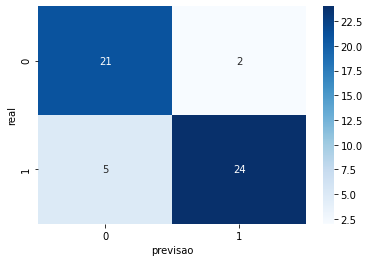

In [37]:
#confusion Matrix

res=yval
pred=p_

cf=pd.DataFrame({'real': res, 'previsao':pred})

cf=pd.DataFrame(cf,columns=['real','previsao' ])

cf_matrix=pd.crosstab(cf['real'], cf['previsao'], rownames=['real'] , colnames=['previsao'])

sns.heatmap(cf_matrix, annot=True, cmap='Blues')

### 2023

In [38]:
edicao = 2023

df_futuro = df[df['ANO'] == edicao].copy()
df_futuro = fn_gera_df(df_futuro, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

#scaler = MinMaxScaler().fit(df_futuro[features])
df_estudo_scale = scaler.transform(df_futuro[features]) #retorna um numpy
df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

#adiciona as colunas
df_estudo_scale['ANO'] = df['ANO']
df_estudo_scale['Seleção 1'] = df['Seleção 1']
df_estudo_scale['Seleção 2'] = df['Seleção 2']

dfval = df_futuro[df_futuro['ANO'] == edicao].copy()

Xval = dfval[features]
   
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

In [39]:
df_futuro['p'] = p
df_futuro['p_'] = p_

In [40]:
df_futuro[df_futuro['Fase'] == "Grupo F"][['ANO', 'Seleção 1', 'Seleção 2', 'p', 'p_']]

,ANO,Seleção 1,Seleção 2,p,p_
30,2023,França,Jamaica,1.000000e+00,1
31,2023,Brasil,Panamá,1.000000e+00,1
32,2023,França,Brasil,7.728646e-24,0
33,2023,Panamá,Jamaica,1.245605e-03,0
34,2023,Panamá,França,1.634891e-22,0
35,2023,Jamaica,Brasil,7.444813e-39,0


In [41]:
df_futuro[['ANO', 'Seleção 1', 'Seleção 2', 'Fase', 'p', 'p_']]

,ANO,Seleção 1,Seleção 2,Fase,p,p_
0,2023,Nova Zelândia,Noruega,Grupo A,2.714309e-31,0
1,2023,Filipinas,Suíça,Grupo A,2.078318e-08,0
2,2023,Nova Zelândia,Filipinas,Grupo A,1.000000e+00,1
3,2023,Suíça,Noruega,Grupo A,1.384903e-39,0
4,2023,Suíça,Nova Zelândia,Grupo A,8.625452e-01,1
5,2023,Noruega,Filipinas,Grupo A,1.000000e+00,1
6,2023,Austrália,Irlanda,Grupo B,1.000000e+00,1
7,2023,Nigéria,Canadá,Grupo B,1.000000e+00,1
8,2023,Canadá,Irlanda,Grupo B,1.000000e+00,1
9,2023,Austrália,Nigéria,Grupo B,1.000000e+00,1


### Oitavas

In [42]:
oitavas = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Noruega", "Seleção 2": "Espanha","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Estados Unidos", "Seleção 2": "Itália","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Japão", "Seleção 2": "Suíça","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Suécia", "Seleção 2": "Países Baixos","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Austrália", "Seleção 2": "Inglaterra","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Brasil", "Seleção 2": "Colombia","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "China", "Seleção 2": "Canadá","Fase":"Oitavas"},
    {"ANO": 2023, "Seleção 1": "Alemanha", "Seleção 2": "França","Fase":"Oitavas"}
                       ])
oitavas

,ANO,Seleção 1,Seleção 2,Fase
0,2023,Noruega,Espanha,Oitavas
1,2023,Estados Unidos,Itália,Oitavas
2,2023,Japão,Suíça,Oitavas
3,2023,Suécia,Países Baixos,Oitavas
4,2023,Austrália,Inglaterra,Oitavas
5,2023,Brasil,Colombia,Oitavas
6,2023,China,Canadá,Oitavas
7,2023,Alemanha,França,Oitavas


In [43]:
oitavas = fn_gera_df(oitavas, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

#scaler = MinMaxScaler().fit(df_futuro[features])
df_estudo_scale = scaler.transform(oitavas[features]) #retorna um numpy
df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

#adiciona as colunas
df_estudo_scale['ANO'] = df['ANO']
df_estudo_scale['Seleção 1'] = df['Seleção 1']
df_estudo_scale['Seleção 2'] = df['Seleção 2']

dfval = oitavas[oitavas['ANO'] == edicao].copy()

Xval = dfval[features].fillna(0)
   
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)


oitavas['p'] = p
oitavas['p_'] = p_

oitavas

,ANO,Seleção 1,Seleção 2,Fase,n_games_SEL1,gols_feitos_SEL1,gols_sofridos_SEL1,saldo_SEL1,SELECAO_SEL1,n_games_SEL2,...,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2,p,p_
0,2023,Noruega,Espanha,Oitavas,43.0,101.0,59.0,42.0,Noruega,10.0,...,0.0,1.0,-1.0,Espanha,3.0,8.0,0.0,8.0,1.000000,1
1,2023,Estados Unidos,Itália,Oitavas,53.0,155.0,49.0,106.0,Estados Unidos,15.0,...,4.0,1.0,3.0,Itália,3.0,1.0,0.0,1.0,1.000000,1
2,2023,Japão,Suíça,Oitavas,36.0,50.0,60.0,-10.0,Japão,7.0,...,7.0,0.0,7.0,Suíça,3.0,2.0,0.0,2.0,1.000000,1
3,2023,Suécia,Países Baixos,Oitavas,43.0,76.0,55.0,21.0,Suécia,14.0,...,2.0,1.0,1.0,Países Baixos,3.0,2.0,1.0,1.0,1.000000,1
4,2023,Austrália,Inglaterra,Oitavas,29.0,42.0,57.0,-15.0,Austrália,29.0,...,3.0,3.0,0.0,Inglaterra,3.0,2.0,0.0,2.0,0.999767,1
5,2023,Brasil,Colombia,Oitavas,37.0,78.0,50.0,28.0,Brasil,NaN,...,4.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,1.000000,1
6,2023,China,Canadá,Oitavas,36.0,62.0,41.0,21.0,China,30.0,...,1.0,1.0,0.0,Canadá,3.0,2.0,1.0,1.0,1.000000,1
7,2023,Alemanha,França,Oitavas,47.0,132.0,43.0,89.0,Alemanha,22.0,...,6.0,0.0,6.0,França,3.0,0.0,0.0,0.0,1.000000,1


### quartas

In [44]:
quartas = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Noruega", "Seleção 2": "Estados Unidos","Fase":"Quartas"},
    {"ANO": 2023, "Seleção 1": "Japão", "Seleção 2": "Suécia","Fase":"Quartas"},
    {"ANO": 2023, "Seleção 1": "Austrália", "Seleção 2": "Brasil", "Fase":"Quartas"},
    {"ANO": 2023, "Seleção 1": "China", "Seleção 2": "Alemanha", "Fase":"Quartas"}
                       ])
quartas

,ANO,Seleção 1,Seleção 2,Fase
0,2023,Noruega,Estados Unidos,Quartas
1,2023,Japão,Suécia,Quartas
2,2023,Austrália,Brasil,Quartas
3,2023,China,Alemanha,Quartas


In [45]:
quartas = fn_gera_df(quartas, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

#scaler = MinMaxScaler().fit(df_futuro[features])
df_estudo_scale = scaler.transform(quartas[features]) #retorna um numpy
df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

#adiciona as colunas
df_estudo_scale['ANO'] = df['ANO']
df_estudo_scale['Seleção 1'] = df['Seleção 1']
df_estudo_scale['Seleção 2'] = df['Seleção 2']


dfval = quartas[quartas['ANO'] == edicao].copy()

Xval = dfval[features].fillna(0)
   
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

quartas['p'] = p
quartas['p_'] = p_

quartas

,ANO,Seleção 1,Seleção 2,Fase,n_games_SEL1,gols_feitos_SEL1,gols_sofridos_SEL1,saldo_SEL1,SELECAO_SEL1,n_games_SEL2,...,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2,p,p_
0,2023,Noruega,Estados Unidos,Quartas,43.0,101.0,59.0,42.0,Noruega,53.0,...,0.0,1.0,-1.0,Estados Unidos,3.0,4.0,1.0,3.0,1.338913e-32,0
1,2023,Japão,Suécia,Quartas,36.0,50.0,60.0,-10.0,Japão,43.0,...,7.0,0.0,7.0,Suécia,3.0,2.0,1.0,1.0,9.968908e-01,1
2,2023,Austrália,Brasil,Quartas,29.0,42.0,57.0,-15.0,Austrália,37.0,...,3.0,3.0,0.0,Brasil,3.0,4.0,0.0,4.0,5.941386e-13,0
3,2023,China,Alemanha,Quartas,36.0,62.0,41.0,21.0,China,47.0,...,1.0,1.0,0.0,Alemanha,3.0,6.0,0.0,6.0,1.256968e-38,0


### Semi

In [50]:
semi = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Estados Unidos", "Seleção 2": "Japão","Fase":"SEMI"},
    {"ANO": 2023, "Seleção 1": "Brasil", "Seleção 2": "Alemanha","Fase":"SEMI"}
                       ])
semi

,ANO,Seleção 1,Seleção 2,Fase
0,2023,Estados Unidos,Japão,SEMI
1,2023,Brasil,Alemanha,SEMI


In [51]:
semi = fn_gera_df(semi, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

#scaler = MinMaxScaler().fit(df_futuro[features])
df_estudo_scale = scaler.transform(semi[features]) #retorna um numpy
df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

#adiciona as colunas
df_estudo_scale['ANO'] = df['ANO']
df_estudo_scale['Seleção 1'] = df['Seleção 1']
df_estudo_scale['Seleção 2'] = df['Seleção 2']

dfval = semi[semi['ANO'] == edicao].copy()
Xval = dfval[features].fillna(0)

p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

semi['p'] = p
semi['p_'] = p_

semi

,ANO,Seleção 1,Seleção 2,Fase,n_games_SEL1,gols_feitos_SEL1,gols_sofridos_SEL1,saldo_SEL1,SELECAO_SEL1,n_games_SEL2,...,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2,p,p_
0,2023,Estados Unidos,Japão,SEMI,53.0,155.0,49.0,106.0,Estados Unidos,36.0,...,4.0,1.0,3.0,Japão,3.0,7.0,0.0,7.0,1.000000e+00,1
1,2023,Brasil,Alemanha,SEMI,37.0,78.0,50.0,28.0,Brasil,47.0,...,4.0,0.0,4.0,Alemanha,3.0,6.0,0.0,6.0,1.653759e-28,0


### Final

In [52]:
final = pd.DataFrame([
    {"ANO": 2023, "Seleção 1": "Estados Unidos", "Seleção 2": "Alemanha","Fase":"FINAL"}])
final

,ANO,Seleção 1,Seleção 2,Fase
0,2023,Estados Unidos,Alemanha,FINAL


In [53]:
final = fn_gera_df(final, df_status_acumulado, df_status)
features = ['n_games_SEL1', 'gols_feitos_SEL1', 'gols_sofridos_SEL1', 'saldo_SEL1',
            'n_games_SEL2', 'gols_feitos_SEL2', 'gols_sofridos_SEL2', 'saldo_SEL2', 
            'n_games_status1','gols_feitos_status1', 'gols_sofridos_status1', 'saldo_status1',
            'n_games_status2', 'gols_feitos_status2', 'gols_sofridos_status2', 'saldo_status2']

#scaler = MinMaxScaler().fit(df_futuro[features])
df_estudo_scale = scaler.transform(final[features]) #retorna um numpy
df_estudo_scale = pd.DataFrame(df_estudo_scale, columns = features) #converte para pandas

#adiciona as colunas
df_estudo_scale['ANO'] = df['ANO']
df_estudo_scale['Seleção 1'] = df['Seleção 1']
df_estudo_scale['Seleção 2'] = df['Seleção 2']

dfval = final[final['ANO'] == edicao].copy()

Xval = dfval[features].fillna(0)
   
p = mdl.predict_proba(Xval)[:,1]
p_ = mdl.predict(Xval)

final['p'] = p
final['p_'] = p_

final

,ANO,Seleção 1,Seleção 2,Fase,n_games_SEL1,gols_feitos_SEL1,gols_sofridos_SEL1,saldo_SEL1,SELECAO_SEL1,n_games_SEL2,...,gols_feitos_status1,gols_sofridos_status1,saldo_status1,SELECAO_status2,n_games_status2,gols_feitos_status2,gols_sofridos_status2,saldo_status2,p,p_
0,2023,Estados Unidos,Alemanha,FINAL,53.0,155.0,49.0,106.0,Estados Unidos,47.0,...,4.0,1.0,3.0,Alemanha,3.0,6.0,0.0,6.0,7.221546e-13,0
